<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/gradient_decent_1variable_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1변수 함수의 경사하강법
## - 로컬 미니마(local minima) 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialGD:
    def __init__(self, coeffs, lr=0.01, epochs=1000, init_x=0.0, h = 1e-5):
        """
        coeffs: [a, b, c, d, e] 형태의 4차 다항식 계수 리스트
        """
        self.coeffs = np.array(coeffs) # 계수
        self.lr = lr                   # 학습률
        self.epochs = epochs           # 반복횟수
        self.init_x = init_x           # 초깃값 x_0
        self.h = h                     # 도함수 근사를 위한 작은 h
        self.x_n = np.zeros(epochs + 1)  # numpy 0 배열로 x_n을 초기화
        self.x_n[0] = init_x           # 초깃값 입력

    def f(self, x):
        a, b, c, d, e = self.coeffs
        return a*x**4 + b*x**3 + c*x**2 + d*x + e

    def df(self, x):
        a, b, c, d, _ = self.coeffs  # e는 받지 않음
        return 4*a*x**3 + 3*b*x**2 + 2*c*x + d

    def dfh(self, x):   # 수치 미분
        return (self.f(x + self.h) - self.f(x)) / self.h

    def optimize(self, verbose=False, print_steps=10):
        for i in range(self.epochs):
            x_prev = self.x_n[i]
            grad = self.df(x_prev)
            self.x_n[i+1] = x_prev - self.lr * grad

            if verbose and i < print_steps: # print_steps회까지만 출력
                print(f"Step {i+1:3d}: x = {self.x_n[i+1]:.6f}, f(x) = {self.f(self.x_n[i+1]):.6f}")
        self.f_vals = self.f(self.x_n)

    def plot(self, num_pts):
        x_range = np.linspace(-1.5, 3, 400) # 정의역 설정. -1.5부터 3까지 등간격으로 400개 점 생성
        f_range = self.f(x_range)           # 함숫값 계산. numpy배열로 한번에 계산됨

        plt.figure(figsize=(8, 5)) #가로8 세로5 크기의 빈 figure 생성
        plt.plot(x_range, f_range, label='Function $f(x)$') #생성된 figure위에 plot하기
        plt.plot(self.x_n[:num_pts+1], self.f_vals[:num_pts+1], 'bo', markersize=4, label='Gradient Steps') # (x_n, f(x_n)) plot 겹치기

        for i in range(min(num_pts, len(self.x_n)-1)): # 화살표 만들기 - 안 중요함
            plt.annotate(
                '',
                xy=(self.x_n[i+1], self.f_vals[i+1]),
                xytext=(self.x_n[i], self.f_vals[i]),
                arrowprops=dict(arrowstyle='->', color='blue', lw=1.2),
            )

        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Gradient Descent on Polynomial")
        plt.legend()
        plt.grid(True)
        plt.show()



Step   1: x = -0.575000, f(x) = -1.879124
Step   2: x = -0.650512, f(x) = -2.439684
Step   3: x = -0.722822, f(x) = -2.940113
Step   4: x = -0.788284, f(x) = -3.338986
Step   5: x = -0.844125, f(x) = -3.621481
Step   6: x = -0.889032, f(x) = -3.799759
Step   7: x = -0.923234, f(x) = -3.901059
Step   8: x = -0.948095, f(x) = -3.953722
Step   9: x = -0.965505, f(x) = -3.979234
Step  10: x = -0.977357, f(x) = -3.990956
Step  11: x = -0.985264, f(x) = -3.996142
Step  12: x = -0.990465, f(x) = -3.998377
Step  13: x = -0.993854, f(x) = -3.999324
Step  14: x = -0.996048, f(x) = -3.999720
Step  15: x = -0.997464, f(x) = -3.999884


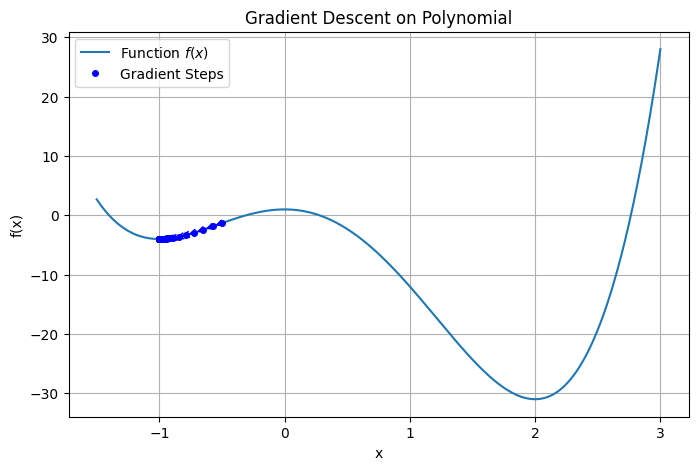

Step   1: x = 1.725000, f(x) = -28.676280
Step   2: x = 1.880121, f(x) = -30.516478
Step   3: x = 1.958018, f(x) = -30.938021
Step   4: x = 1.987196, f(x) = -30.994140
Step   5: x = 1.996317, f(x) = -30.999513
Step   6: x = 1.998961, f(x) = -30.999961
Step   7: x = 1.999708, f(x) = -30.999997
Step   8: x = 1.999918, f(x) = -31.000000
Step   9: x = 1.999977, f(x) = -31.000000
Step  10: x = 1.999994, f(x) = -31.000000
Step  11: x = 1.999998, f(x) = -31.000000
Step  12: x = 1.999999, f(x) = -31.000000
Step  13: x = 2.000000, f(x) = -31.000000
Step  14: x = 2.000000, f(x) = -31.000000
Step  15: x = 2.000000, f(x) = -31.000000


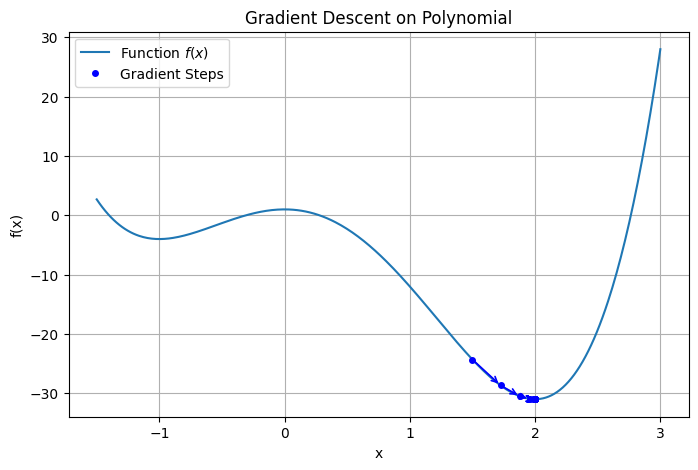

In [2]:
# 예: f(x) = x^2 - 4x + 5'
#coeffs = [0, 0, 1, -4, 5]

# 예: 로컬 미니마를 가진 함수: f(x) = 3x^4 - 4x^3 -12x^2+ 1
coeffs = [3, -4, -12, 0, 1]

# 시작점을 0.5으로 하면 왼쪽 로컬 미니마로 떨어짐
gd1 = PolynomialGD(coeffs, lr=0.01, epochs=2000, init_x=-0.5)
gd1.optimize(verbose=True, print_steps=15)
gd1.plot(num_pts=30)


# 시작점을 1.5으로 하면 오른쪽 글로벌 미니마 쪽으로 떨어짐
gd2 = PolynomialGD(coeffs, lr=0.01, epochs=2000, init_x=1.5)
gd2.optimize(verbose=True, print_steps=15)
gd2.plot(num_pts=30)

# x_test = 1.5
# print(f"Analytic Derivative df({x_test})  = {gd1.df(x_test):.6f}")
# print(f"Numeric  Derivative dfh({x_test}) = {gd1.dfh(x_test):.6f}")